In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
import scipy.io as sio

In [215]:
var1=sio.loadmat('ECG.mat')
query=sio.loadmat('ECG_query.mat')

In [216]:
print(var1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Wed Feb 15 10:40:48 2012', '__version__': '1.0', '__globals__': [], 'ECG': array([[-2.0000e-02],
       [-1.0000e-02],
       [-5.0000e-03],
       ...,
       [-1.6384e+02],
       [-1.6384e+02],
       [-1.6384e+02]])}


In [217]:
var2=pd.DataFrame(var1['ECG'])
query2=pd.DataFrame(query['ecg_query'])

## Select a Region of the ECG to be displayed using variables

In [218]:
init=180
length=1000
end=init+length

         0
0    0.010
1    0.005
2    0.000
3   -0.005
4   -0.010
5   -0.010
6   -0.010
7   -0.010
8   -0.010
9   -0.015
10  -0.015
11  -0.005
12  -0.005
13  -0.010
14  -0.010
15  -0.010
16  -0.010
17  -0.010
18  -0.015
19  -0.015
20  -0.020
21  -0.020
22  -0.010
23  -0.005
24   0.000
25   0.010
26   0.090
27   0.175
28   0.250
29   0.320
..     ...
970  0.280
971  0.275
972  0.265
973  0.245
974  0.220
975  0.200
976  0.185
977  0.165
978  0.145
979  0.130
980  0.110
981  0.090
982  0.070
983  0.075
984  0.085
985  0.075
986  0.060
987  0.055
988  0.050
989  0.040
990  0.030
991  0.030
992  0.025
993  0.025
994  0.025
995  0.045
996  0.055
997  0.040
998  0.035
999  0.040

[1000 rows x 1 columns]


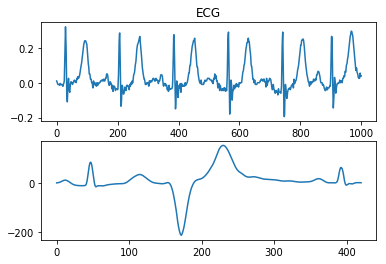

In [219]:
selected=var2[init:end]
selected.index=np.arange(0,length)
print(selected)
plt.subplot(2,1,2)
plt.plot(query2)


plt.subplot(2,1,1)
plt.title('ECG')
plt.plot(selected)



## Highlight Max Min on the selected region
### Includes finding the index of the points

In [220]:
#Example of finding the max min from a list/array
s = ['1.1881', '1.1881', '1.1881', '1.1881', '1.1881', '1.1881', 
'1.1881', '1.1881', '1.1881', '1.1881', '1.7689', 
'1.7689', '3.4225', '7.7284', '10.24', '9.0601', '9.0601', '9.0601', 
'9.0601', '9.0601'] 

print (type(s))
print (min(s))
print (max(s))

<class 'list'>
1.1881
9.0601


In [221]:
#finding the index of the min and max of a series
maxind=selected.idxmax()
minind=selected.idxmin()

In [222]:
#finding the value of the max min
minval=selected.loc[minind]
maxval=selected.loc[maxind]

<IPython.core.display.Javascript object>


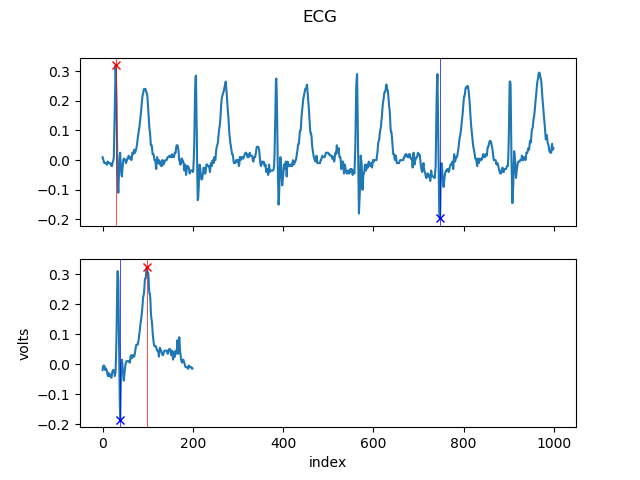

In [223]:
%matplotlib notebook
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle('ECG')
plt.xlabel('index')
plt.ylabel('volts')
ax1.plot(selected)
ax1.plot(selected.loc[maxind],'rx')
ax1.plot(selected.loc[minind],'bx')
ax1.axvline(x=minind.values,color='b',linewidth=0.5)
ax1.axvline(x=maxind.values,color='r',linewidth=0.5)

selected2=var2[0:200]
maxind=selected2.idxmax()
minind=selected2.idxmin()
ax2.plot(selected2)
ax2.plot(selected2.loc[maxind],'rx')
ax2.plot(selected2.loc[minind],'bx')
ax2.axvline(x=minind.values,color='b',linewidth=0.5)
ax2.axvline(x=maxind.values,color='r',linewidth=0.5)


plt.show() #what is this for?

### Save the plot

In [211]:
fig.savefig('minmaxECG.png')#note how that this allows you to select which figure to save

## Select a single point on the graph

## Highlight the part of the graphs that is above a certain value, example above 0.1
### find the index and values that are above 0.1

In [212]:
selected>0.1
val1=selected[selected[0]>0.1]
print(val1.index)

Int64Index([ 27,  28,  29,  30,  31,  81,  82,  83,  84,  85,
            ...
            971, 972, 973, 974, 975, 976, 977, 978, 979, 980],
           dtype='int64', length=170)


### Also includes zeroing all that is below that, such that the plot is flat on values below 0.1

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


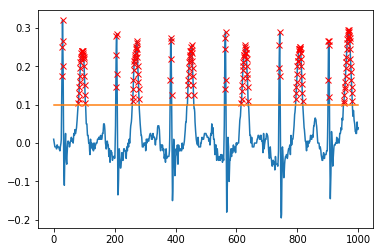

In [213]:
plt.plot(selected)
plt.plot(val1,'rx')
selected2=selected
lindex=selected2[0]>0.1
lindex=~lindex
selected2.loc[lindex.index]=0.1
plt.plot(selected2)


# Using DTW
## Distinguish each cycle using DTW
### Find Min and max of each cycle and highlight them